In [4]:
#importing the library 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#reading the data from csv file using pandas
dataset=pd.read_csv('Mall_Customers.csv')

In [7]:
#print the values 
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
#without the values of columns and rows and with the range
x=dataset.iloc[0:5,0:4]
x

,CustomerID,Genre,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [16]:
#with the values selcted full rows and selective columns
x=dataset.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


C:\Anconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


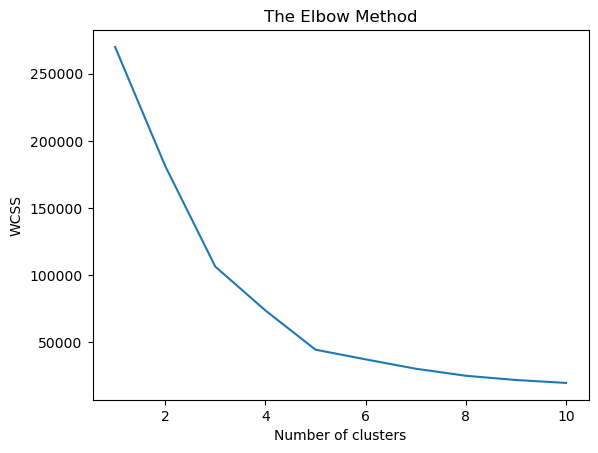

In [18]:
#calculating the number of clusters in problem statement
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmeans.fit(x)
    list1.append(kmeans.inertia_)
plt.plot(range(1,11),list1)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#view the values appended in list
list1

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.83934915659,
 21850.16528258563,
 19672.07284901432]

In [22]:
#create the model for predict
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [23]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [24]:
#assigning the values dataset to supervised 
supervised=dataset

In [25]:
#to print the values of supervised
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
#append the clustered values on supervised table 
supervised['cluster_group']=y_kmeans

In [28]:
#view the appended values on table
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [29]:
#to save the table of content to csv file
supervised.to_csv("cluster",index=False)

In [30]:
#view the directory of kmeans
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',

In [31]:
#in the cluster center points
centroids=kmeans.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [34]:
#to print the columns of 3rd name 
supervised.columns[3]

'Annual Income (k$)'

In [36]:
#get the all columns names
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster_group'],
      dtype='object')

C:\Anconda\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


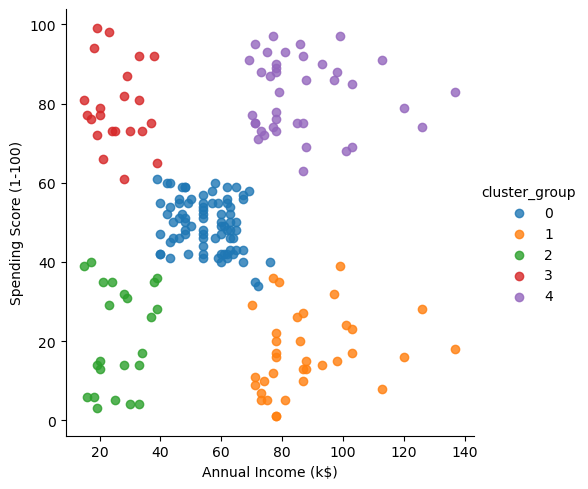

In [43]:

#to plot the cluster in graph, in this hue use for difference of cluster,
#fit_reg for plot the coorect manner
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],
                 fit_reg=False,hue=supervised.columns[5],legend=True,legend_out=True)